# Objective
In this Model I took MNIST data set which contain image for 0 to 9 digits. HEre I used a squential model to predict the image of digits between 0 to 9.



In [1]:
# import all the libraries 
import numpy as np
import random 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

f:\installedsoftware\anaconda\envs\rasa\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# here loading the MNIST dataa set
(x_train, y_train), (x_test,y_test)=mnist.load_data()

In [3]:
print("train data.....")
print("Input Train data shape is ",x_train.shape)
print("Output Train data shape is ",y_train.shape)
print("Test data.....")
print("Input Test data shape is ",x_test.shape)
print("Output Test data shape is ",y_test.shape)

train data.....
Input Train data shape is  (60000, 28, 28)
Output Train data shape is  (60000,)
Test data.....
Input Test data shape is  (10000, 28, 28)
Output Test data shape is  (10000,)


In [4]:
# here taking random data of 30000 size only 
idx=np.random.randint(x_train.shape[0],size=30000)
x_train=x_train[idx,:]
y_train=y_train[idx]
print("train data.....")
print("Input Train data shape is ",x_train.shape)
print("Output Train data shape is ",y_train.shape)

train data.....
Input Train data shape is  (30000, 28, 28)
Output Train data shape is  (30000,)


In [5]:
# defining the shape attributes for the input data set like row ,col, no. of channel
img_rows, img_cols= 28, 28
input_shape=(img_rows,img_cols,1)

batch_size=128
num_classes=10

epochs=10

In [6]:
# Here I reshape the train and test data by adding one more dimension for channel no. 
# here image is grey scale so i took 1 in 4th dimension
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
print(x_train.shape)
print(x_test.shape)


(30000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# convert class labels (from digits) to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(30000, 10)


In [8]:
x_train.dtype

dtype('uint8')

In [9]:
# Here I converted the data type as float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# normalisinf the pixels
x_train/=255
x_test/=255

In [10]:
model= Sequential()
# here I add one convoluation layer with 32 filters of size (2,2)
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=input_shape))
# here I add one Max pooling layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))
# here I add the flatten layer 
model.add(Flatten())
model.add(Dense(128,activation='relu'))
# here I add the fully connected layer
model.add(Dense(num_classes,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,802
Trainable params: 693,802
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [12]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 25s 818us/step - loss: 0.4266 - acc: 0.8716 - val_loss: 0.2930 - val_acc: 0.9057
Epoch 2/10
30000/30000 [==============================] - 24s 813us/step - loss: 0.1672 - acc: 0.9494 - val_loss: 0.1982 - val_acc: 0.9354
Epoch 3/10
30000/30000 [==============================] - 24s 810us/step - loss: 0.1079 - acc: 0.9688 - val_loss: 0.1256 - val_acc: 0.9606
Epoch 4/10
30000/30000 [==============================] - 24s 811us/step - loss: 0.0767 - acc: 0.9774 - val_loss: 0.0910 - val_acc: 0.9721
Epoch 5/10
30000/30000 [==============================] - 24s 794us/step - loss: 0.0552 - acc: 0.9840 - val_loss: 0.0844 - val_acc: 0.9738
Epoch 6/10
30000/30000 [==============================] - 24s 789us/step - loss: 0.0429 - acc: 0.9883 - val_loss: 0.1102 - val_acc: 0.9654
Epoch 7/10
30000/30000 [==============================] - 24s 811us/step - loss: 0.0331 - acc: 0.9909 - val_loss: 0.

In [13]:
_, acc = model.evaluate(x_test, y_test, verbose=0)

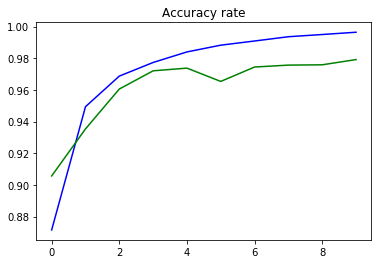

In [24]:
import matplotlib.pyplot as plt
plt.title('Accuracy rate')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='green', label='test') 
plt.show()
    

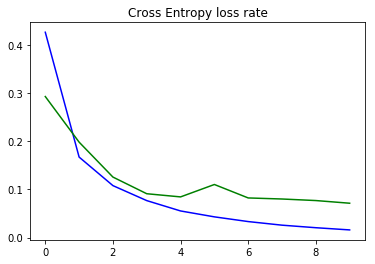

In [26]:
plt.title('Cross Entropy loss rate')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test') 
plt.show()
    

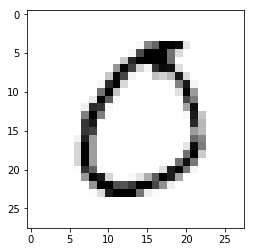

In [29]:
# took image of index 586 for make prediction
plt.imshow(x_test[586].reshape(28, 28),cmap='Greys')


In [32]:
pred = model.predict(x_test[586].reshape(1, img_rows, img_cols, 1))
print("The given image is of",pred.argmax())

The given image is of 0
